<a href="https://colab.research.google.com/github/prabirdeb/Credit_Risk_Reunion/blob/main/Credit_Risk_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Risk EDA**

I am provided with anonymized data on about 1000 loan applications, along with a certain set of attributes about the applicant itself, and whether they were considered high risk.

0 = Low credit risk i.e high chance of paying back the loan amount

1 = High credit risk i.e low chance of paying back the loan amount

**TASK-1**

1. Do the Exploratory Data Analysis & share the insights.
2. How would you segment customers based on their risk (of default).
3. Which of these segments / sub-segments would you propose be approved?
    - For e.g. Would a person with critical credit history be more creditworthy? Are young people more creditworthy? Would a person with more credit accounts be more creditworthy?
4. Tell us what your observations were on the data itself (completeness, skews).

# **Exploration and Pre-processing of Data**



## **1. Connection with the Data**

At first, we import the libraries or functions for **making our journey easy** and then **get connected** to the set of experiences.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Using matplotlib backend: agg


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the data as pandas dataframe
applicant_df=pd.read_csv('/content/drive/MyDrive/Interview assignments/Reunion/applicant.csv')
loan_df=pd.read_csv('/content/drive/MyDrive/Interview assignments/Reunion/loan.csv')

## **2. First Feelings of the Data**

Columns are the set of features, showing the way to reach final conclusions.  

As there is a huge no. of experiences, we cannot see the whole lot of experiences and therefore we find the features on the **data head**.

In [4]:
applicant_df.head(2)

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac


In [5]:
loan_df.head(2)

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1


## **3. Deeper Understanding of the Data**

As there is a huge no. of experiences, we take the help of **statistics to measure** each and every features in different dimensions and thus step by step, we find the most important features or the exact way to decode the experiences.

In [6]:
applicant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [7]:
applicant_df.describe()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,35.546000,1.155000,2.845000,0.963000
std,2.286764e+05,11.375469,0.362086,1.103718,0.188856
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000
25%,1.321398e+06,27.000000,1.000000,2.000000,1.000000
50%,1.529114e+06,33.000000,1.000000,3.000000,1.000000
75%,1.707752e+06,42.000000,1.000000,4.000000,1.000000
max,1.903505e+06,75.000000,2.000000,4.000000,1.000000


In [8]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   loan_application_id                          1000 non-null   object
 1   applicant_id                                 1000 non-null   int64 
 2   Months_loan_taken_for                        1000 non-null   int64 
 3   Purpose                                      988 non-null    object
 4   Principal_loan_amount                        1000 non-null   int64 
 5   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64 
 6   Property                                     846 non-null    object
 7   Has_coapplicant                              1000 non-null   int64 
 8   Has_guarantor                                1000 non-null   int64 
 9   Other_EMI_plans                              186 non-null    object
 10  Number_of_exi

In [9]:
loan_df.describe()

,applicant_id,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,2.286764e+05,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,1.105364e+06,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.321398e+06,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.529114e+06,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.707752e+06,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.903505e+06,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


In [10]:
applicant_df.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)'],
      dtype='object')

In [11]:
loan_df.columns

Index(['loan_application_id', 'applicant_id', 'Months_loan_taken_for',
       'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

## **4. Cleaning the Data**

In this step, we treat null, missing, "?" or duplicate values.

When there is any string containing a Python literal in any of the important feature, we also evaluate them.

We do encoding of categorical features to make it usuable in the model.

We also create new feature when found important during the analysis.

Thus, we get a clean experience set with important features. 

We check the statistics further on clean data.

###4.1 Creating Dataset with Relevant Features

In [ ]:
# Finding out the relevant features from the deeper understanding of the data
relevant_features=['Age', 'Age1stCode', 'ConvertedComp', 'Country', 'EdLevel', 'Employment', 'DevType', 'Gender', 
                   'JobSat', 'JobFactors', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'NEWEdImpt', 'NEWLearn',
                   'NEWOvertime', 'NEWStuck', 'WorkWeekHrs', 'YearsCode', 'YearsCodePro']

In [ ]:
# Creating new df with relevant features
survey_public_df_clean=survey_public_df[relevant_features]

###4.2 Treating the missing, null or duplicate values

In [ ]:
# Checking is there any duplicate value
len(survey_public_df_clean[survey_public_df_clean.duplicated()]) 

2392

In [ ]:
survey_public_df_clean.shape

(64461, 19)

In [ ]:
survey_public_df_clean.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
survey_public_df_clean.shape

(62069, 19)

In [ ]:
# checking the no. of null values in each column
print(survey_public_df_clean.isnull().sum())

Age                       16624
Age1stCode                 4171
ConvertedComp             27314
Country                       8
EdLevel                    4735
Employment                  378
DevType                   12700
Gender                    11512
JobSat                    16876
JobFactors                12721
LanguageDesireNextYear     7962
LanguageWorkedWith         4698
NEWEdImpt                 13635
NEWLearn                   6001
NEWOvertime               18839
NEWStuck                   7087
WorkWeekHrs               20919
YearsCode                  4387
YearsCodePro              15721
dtype: int64


In [ ]:
survey_public_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62069 entries, 0 to 64460
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     45445 non-null  float64
 1   Age1stCode              57898 non-null  object 
 2   ConvertedComp           34755 non-null  float64
 3   Country                 62061 non-null  object 
 4   EdLevel                 57334 non-null  object 
 5   Employment              61691 non-null  object 
 6   DevType                 49369 non-null  object 
 7   Gender                  50557 non-null  object 
 8   JobSat                  45193 non-null  object 
 9   JobFactors              49348 non-null  object 
 10  LanguageDesireNextYear  54107 non-null  object 
 11  LanguageWorkedWith      57371 non-null  object 
 12  NEWEdImpt               48434 non-null  object 
 13  NEWLearn                56068 non-null  object 
 14  NEWOvertime             43230 non-null

In [ ]:
# "Age1stCode", "YearsCode", "YearsCodePro" are numeric values appearing as string. Needs to be converted                        

In [ ]:
survey_public_df_clean.head(2)

,Age,Age1stCode,ConvertedComp,Country,EdLevel,Employment,DevType,Gender,JobSat,JobFactors,LanguageDesireNextYear,LanguageWorkedWith,NEWEdImpt,NEWLearn,NEWOvertime,NEWStuck,WorkWeekHrs,YearsCode,YearsCodePro
0,NaN,13,NaN,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",Man,Slightly satisfied,"Languages, frameworks, and other technologies ...",C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Fairly important,Once a year,Often: 1-2 days per week or more,Visit Stack Overflow;Go for a walk or other ph...,50.0,36,27
1,NaN,19,NaN,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,Python;Swift,JavaScript;Swift,Fairly important,Once a year,NaN,Visit Stack Overflow;Go for a walk or other ph...,NaN,7,4


In [ ]:
# Imputing null values in age with median
survey_public_df_clean['Age']=survey_public_df_clean['Age'].fillna(survey_public_df_clean['Age'].median())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
survey_public_df_clean["Age1stCode"].unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [ ]:
survey_public_df_clean["YearsCode"].unique()

array(['36', '7', '4', '15', '6', '17', '8', '10', '35', '5', '37', '19',
       '9', '22', '30', '23', '20', '2', 'Less than 1 year', '3', '13',
       '25', '16', '43', '11', '38', '33', nan, '24', '21', '12', '40',
       '27', '50', '46', '14', '18', '28', '32', '44', '26', '42', '31',
       '34', '29', '1', '39', '41', '45', 'More than 50 years', '47',
       '49', '48'], dtype=object)

In [ ]:
survey_public_df_clean["YearsCodePro"].unique()

array(['27', '4', nan, '8', '13', '2', '7', '20', '1', '23', '3', '12',
       '17', '18', '10', '14', '29', '6', '28', '9', '15', '11', '16',
       '25', 'Less than 1 year', '5', '21', '19', '35', '24', '32', '22',
       '30', '38', '26', '40', '33', '31', 'More than 50 years', '34',
       '36', '39', '37', '41', '45', '47', '42', '46', '50', '43', '44',
       '48', '49'], dtype=object)

In [ ]:
# There are sentences in the above columns. We need to extract the number from that

In [ ]:
# Filling null values with zero and conversion of string to int 
for k in ["Age1stCode", "YearsCode", "YearsCodePro"]:
  survey_public_df_clean[k]=survey_public_df_clean[k].fillna("0") 
  survey_public_df_clean[k]=survey_public_df_clean[k].apply(lambda x: [int(i) for i in x.split() if i.isdigit()][0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Imputing zero values with median
for k in ["Age1stCode", "YearsCode", "YearsCodePro"]:
  survey_public_df_clean[k].replace(0, survey_public_df_clean[k].median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

In [ ]:
survey_public_df_clean.describe()

,Age,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro
count,62069.000000,62069.000000,3.475500e+04,41150.000000,62069.000000,62069.000000
mean,30.342860,15.389228,1.037580e+05,40.782193,12.456895,7.388503
std,8.242101,5.096007,2.268883e+05,17.816599,9.391077,7.066979
min,1.000000,5.000000,0.000000e+00,1.000000,1.000000,1.000000
25%,26.000000,12.000000,2.464800e+04,40.000000,6.000000,4.000000
50%,29.000000,15.000000,5.404900e+04,40.000000,9.000000,4.000000
75%,33.000000,18.000000,9.500000e+04,44.000000,16.000000,10.000000
max,279.000000,85.000000,2.000000e+06,475.000000,50.000000,50.000000


In [ ]:
survey_public_df_clean[(survey_public_df_clean["ConvertedComp"]==0)]

,Age,Age1stCode,ConvertedComp,Country,EdLevel,Employment,DevType,Gender,JobSat,JobFactors,LanguageDesireNextYear,LanguageWorkedWith,NEWEdImpt,NEWLearn,NEWOvertime,NEWStuck,WorkWeekHrs,YearsCode,YearsCodePro
122,38.0,14,0.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...","Designer;Developer, mobile",Man,Very satisfied,NaN,C++;Swift,Swift,Not at all important/not necessary,Once every few years,Often: 1-2 days per week or more,Visit Stack Overflow;Watch help / tutorial videos,60.0,24,19
236,29.0,13,0.0,United States,"Secondary school (e.g. American high school, G...",Employed part-time,Academic researcher;Data scientist or machine ...,Man,Very satisfied,"Languages, frameworks, and other technologies ...",Dart;Go;Python;R;SQL,Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;Java;J...,Somewhat important,Every few months,Often: 1-2 days per week or more,Meditate;Visit Stack Overflow;Go for a walk or...,12.0,4,2
882,41.0,10,0.0,United States,"Other doctoral degree (Ph.D., Ed.D., etc.)","Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, embedded applic...",Man,Very satisfied,Industry that I’d be working in;Financial perf...,HTML/CSS;JavaScript;Rust,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Python,Critically important,Once every few years,Often: 1-2 days per week or more,Visit Stack Overflow;Go for a walk or other ph...,50.0,25,10
1112,25.0,11,0.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, front-end;Devel...",Man,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",NaN,NaN,Fairly important,Once a year,Never,Meditate,55.0,14,4
1272,21.0,12,0.0,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...","Database administrator;Developer, full-stack;D...",Man,Neither satisfied nor dissatisfied,"Languages, frameworks, and other technologies ...",Bash/Shell/PowerShell;SQL;Swift;TypeScript,Bash/Shell/PowerShell;JavaScript;Objective-C;P...,Fairly important,Once a year,Occasionally: 1-2 days per quarter but less th...,Play games;Visit Stack Overflow;Go for a walk ...,40.0,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61093,41.0,8,0.0,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Developer, back-end;Senior executive/VP",Man,Very satisfied,NaN,Java;Kotlin;Python;Scala,Go;Java;Kotlin;Python;Scala,Fairly important,Every few months,Often: 1-2 days per week or more,Visit Stack Overflow;Watch help / tutorial videos,70.0,30,16
62164,29.0,23,0.0,United States,NaN,"Independent contractor, freelancer, or self-em...","Database administrator;Designer;Developer, bac...",NaN,Very satisfied,Flex time or a flexible schedule;Remote work o...,C++;HTML/CSS;JavaScript,Python;SQL,Not at all important/not necessary,Every few months,Often: 1-2 days per week or more,NaN,75.0,45,40
62658,29.0,24,0.0,Israel,Some college/university study without earning ...,Employed full-time,"Developer, desktop or enterprise applications;...",NaN,Slightly satisfied,NaN,NaN,NaN,Fairly important,NaN,NaN,NaN,NaN,8,8
62676,29.0,20,0.0,Uganda,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed part-time,Academic researcher;Data or business analyst;D...,NaN,Slightly satisfied,Flex time or a flexible schedule;How widely us...,JavaScript;R;Swift,Python;R,Fairly important,NaN,Often: 1-2 days per week or more,NaN,7.0,4,2


In [ ]:
# Removing the rows where the conpensation is zero
survey_public_df_clean= survey_public_df_clean[(survey_public_df_clean["ConvertedComp"]>0)]

In [ ]:
# Checking the conversion from string to int
survey_public_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34613 entries, 7 to 64154
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     34613 non-null  float64
 1   Age1stCode              34613 non-null  int64  
 2   ConvertedComp           34613 non-null  float64
 3   Country                 34613 non-null  object 
 4   EdLevel                 34054 non-null  object 
 5   Employment              34579 non-null  object 
 6   DevType                 34234 non-null  object 
 7   Gender                  32017 non-null  object 
 8   JobSat                  34562 non-null  object 
 9   JobFactors              32944 non-null  object 
 10  LanguageDesireNextYear  31725 non-null  object 
 11  LanguageWorkedWith      33325 non-null  object 
 12  NEWEdImpt               34123 non-null  object 
 13  NEWLearn                32689 non-null  object 
 14  NEWOvertime             34190 non-null

In [ ]:
# Checkin data where Current age is less than age of 1st code (which is unrealistic)
survey_public_df_clean[(survey_public_df_clean["Age"]<survey_public_df_clean["Age1stCode"])]

,Age,Age1stCode,ConvertedComp,Country,EdLevel,Employment,DevType,Gender,JobSat,JobFactors,LanguageDesireNextYear,LanguageWorkedWith,NEWEdImpt,NEWLearn,NEWOvertime,NEWStuck,WorkWeekHrs,YearsCode,YearsCodePro
1445,29.0,35,499164.0,Canada,"Other doctoral degree (Ph.D., Ed.D., etc.)",Employed full-time,Data scientist or machine learning specialist;...,NaN,Very dissatisfied,Diversity of the company or organization;Langu...,JavaScript;Julia;Python,Assembly;HTML/CSS;R,Somewhat important,NaN,NaN,NaN,NaN,6,2
2853,29.0,30,141000.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Designer;Developer, back-end;Educator;System a...",Woman,Slightly dissatisfied,Remote work options;Financial performance or f...,C#;C++;HTML/CSS;Java;JavaScript;SQL,HTML/CSS;JavaScript;SQL,Very important,Once every few years,Often: 1-2 days per week or more,Visit Stack Overflow;Do other work and come ba...,NaN,32,27
3586,33.0,34,75396.0,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Database administrator;Developer, back-end;Dev...",Man,Slightly satisfied,Industry that I’d be working in;Financial perf...,NaN,Bash/Shell/PowerShell;Go;Java;JavaScript;Kotli...,Not at all important/not necessary,Every few months,Often: 1-2 days per week or more,Visit Stack Overflow;Go for a walk or other ph...,50.0,17,13
5160,29.0,30,120000.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Developer, desktop or enterprise applications;...",Man,Slightly satisfied,"Languages, frameworks, and other technologies ...",C#;Java;JavaScript,C#;HTML/CSS;Java;JavaScript,Critically important,Once every few years,Never,Visit Stack Overflow;Go for a walk or other ph...,40.0,25,20
5483,29.0,47,78000.0,United States,"Associate degree (A.A., A.S., etc.)",Employed full-time,"Developer, back-end",Woman,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Dart;Go,C;C#;C++;Java;JavaScript;Objective-C;Python;Swift,Not at all important/not necessary,Once every few years,Rarely: 1-2 days per year or less,Meditate;Go for a walk or other physical activ...,35.0,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60010,29.0,32,86478.0,Ireland,"Secondary school (e.g. American high school, G...",Employed full-time,"Developer, front-end",Man,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,C#;Go;HTML/CSS;JavaScript;Python;TypeScript,HTML/CSS;JavaScript;TypeScript,Very important,Once a year,Often: 1-2 days per week or more,Call a coworker or friend;Visit Stack Overflow...,40.0,3,2
60779,29.0,32,10056.0,India,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed part-time,Data or business analyst;Data scientist or mac...,NaN,Very satisfied,Flex time or a flexible schedule;Remote work o...,NaN,NaN,Very important,NaN,Rarely: 1-2 days per year or less,NaN,40.0,6,1
62053,29.0,32,57500.0,United States,Some college/university study without earning ...,Employed full-time,"Developer, full-stack",NaN,Slightly satisfied,NaN,NaN,NaN,Not at all important/not necessary,NaN,NaN,NaN,NaN,2,1
63345,29.0,31,34591.0,Spain,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,"Designer;Developer, front-end",NaN,Very dissatisfied,Flex time or a flexible schedule;Office enviro...,NaN,NaN,Not at all important/not necessary,NaN,Never,NaN,36.0,12,12


In [ ]:
# There the row where age is less than age of 1st code. Let's remove them
survey_public_df_clean= survey_public_df_clean[(survey_public_df_clean["Age"]>=survey_public_df_clean["Age1stCode"])]

In [ ]:
# Let's check years of coding experience including education less than with out education (which is impossible)
survey_public_df_clean[(survey_public_df_clean["YearsCode"]<survey_public_df_clean["YearsCodePro"])]

,Age,Age1stCode,ConvertedComp,Country,EdLevel,Employment,DevType,Gender,JobSat,JobFactors,LanguageDesireNextYear,LanguageWorkedWith,NEWEdImpt,NEWLearn,NEWOvertime,NEWStuck,WorkWeekHrs,YearsCode,YearsCodePro
320,24.0,18,4188.0,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,Data scientist or machine learning specialist;...,Man,Very satisfied,"Languages, frameworks, and other technologies ...",HTML/CSS;JavaScript;PHP;SQL;TypeScript,HTML/CSS;JavaScript;PHP;SQL;TypeScript,Fairly important,Every few months,Sometimes: 1-2 days per month but less than we...,Play games;Visit Stack Overflow;Go for a walk ...,42.0,1,3
420,45.0,10,117229.0,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Developer, back-end;Developer, desktop or ente...",Man,Slightly satisfied,"Languages, frameworks, and other technologies ...",C#;C++;Haskell;Python;Scala;SQL;TypeScript,C#;HTML/CSS;JavaScript;Python;SQL;TypeScript,Fairly important,Every few months,Sometimes: 1-2 days per month but less than we...,Meditate;Call a coworker or friend;Visit Stack...,40.0,9,26
450,26.0,23,42354.0,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Developer, front-end;Marketing or sales profes...",Man,Very satisfied,Flex time or a flexible schedule;Office enviro...,HTML/CSS;JavaScript;Ruby;SQL;Swift;TypeScript;VBA,HTML/CSS;Java;JavaScript;SQL;TypeScript;VBA,Somewhat important,NaN,Sometimes: 1-2 days per month but less than we...,Call a coworker or friend;Go for a walk or oth...,40.0,2,4
511,30.0,17,84019.0,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,"Developer, full-stack;DevOps specialist",Man,Very dissatisfied,Industry that I’d be working in;Flex time or a...,C#;HTML/CSS;JavaScript;SQL;TypeScript,C#;HTML/CSS;JavaScript;SQL;TypeScript,Fairly important,Once every few years,Often: 1-2 days per week or more,Call a coworker or friend;Visit Stack Overflow...,40.0,6,10
677,32.0,10,45000.0,United States,"Professional degree (JD, MD, etc.)",Employed full-time,Scientist,Man,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Python;R;SQL,Python;SQL,Very important,Once a decade,Often: 1-2 days per week or more,Play games;Visit Stack Overflow;Panic;Do other...,35.0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62434,29.0,20,11304.0,Bangladesh,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,"Data or business analyst;Developer, back-end;D...",NaN,Slightly satisfied,Specific department or team I’d be working on,Dart;Python;Rust,Dart,Very important,Once a year,Never,Visit Stack Overflow;Do other work and come ba...,40.0,8,12
62599,29.0,28,8280.0,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Developer, back-end;Developer, front-end;Devel...",NaN,Slightly dissatisfied,Remote work options;Office environment or comp...,C#;HTML/CSS;JavaScript;SQL,C#;HTML/CSS;JavaScript;SQL,Critically important,Once a year,NaN,NaN,56.0,1,4
63114,29.0,18,16056.0,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Developer, embedded applications or devices",NaN,Slightly satisfied,NaN,Kotlin;Swift,C;C++;Java;Objective-C;Python,Fairly important,Once every few years,NaN,Visit Stack Overflow;Go for a walk or other ph...,NaN,4,9
63647,29.0,25,19596.0,United Arab Emirates,NaN,Employed part-time,"Developer, back-end;Developer, front-end;Devel...",NaN,Slightly satisfied,Remote work options;Office environment or comp...,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;TypeScript,Very important,Once a year,Never,Call a coworker or friend;Watch help / tutoria...,8.0,3,10


In [ ]:
# There are rows where experience including education is less than without including education. Let's remove them
survey_public_df_clean = survey_public_df_clean[(survey_public_df_clean["YearsCode"]>=survey_public_df_clean["YearsCodePro"])]

In [ ]:
# Checking Age less than Years of coding experience including education (which is impossible)
survey_public_df_clean[(survey_public_df_clean["Age"]<survey_public_df_clean["YearsCode"])]

,Age,Age1stCode,ConvertedComp,Country,EdLevel,Employment,DevType,Gender,JobSat,JobFactors,LanguageDesireNextYear,LanguageWorkedWith,NEWEdImpt,NEWLearn,NEWOvertime,NEWStuck,WorkWeekHrs,YearsCode,YearsCodePro
42,29.0,16,135000.0,United States,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,"Developer, back-end;Developer, front-end;Devel...",NaN,Very dissatisfied,NaN,Dart;HTML/CSS;Java;JavaScript;SQL,Dart;HTML/CSS;Java;JavaScript;SQL,Very important,Once a year,Sometimes: 1-2 days per month but less than we...,Visit Stack Overflow;Watch help / tutorial videos,45.0,36,29
93,29.0,12,71850.0,Canada,Some college/university study without earning ...,Employed full-time,"Developer, full-stack",Man,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",HTML/CSS;JavaScript,HTML/CSS;JavaScript;PHP;Python;SQL,Not at all important/not necessary,Every few months,Occasionally: 1-2 days per quarter but less th...,Play games;Visit Stack Overflow;Go for a walk ...,40.0,40,25
506,29.0,13,250000.0,United States,"Other doctoral degree (Ph.D., Ed.D., etc.)",Employed full-time,Data scientist or machine learning specialist,NaN,Very satisfied,Remote work options;How widely used or impactf...,Python,Python,Critically important,Once every few years,Occasionally: 1-2 days per quarter but less th...,Call a coworker or friend;Go for a walk or oth...,45.0,37,30
1053,29.0,12,75631.0,Canada,Some college/university study without earning ...,Employed full-time,"Developer, back-end;Developer, desktop or ente...",Man,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Go;HTML/CSS;JavaScript;PHP;Python;Ruby;Rust,C#;HTML/CSS;JavaScript;PHP;Python;Ruby;SQL,Fairly important,Once every few years,Rarely: 1-2 days per year or less,Call a coworker or friend;Visit Stack Overflow...,37.5,30,20
1212,29.0,11,120000.0,Denmark,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,Data scientist or machine learning specialist;...,Man,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",JavaScript;SQL,JavaScript;SQL,Somewhat important,Once a year,Often: 1-2 days per week or more,Play games;Visit Stack Overflow;Go for a walk ...,44.0,38,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63951,29.0,7,109871.0,United Kingdom,"Other doctoral degree (Ph.D., Ed.D., etc.)",Employed full-time,"Developer, back-end",NaN,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",NaN,NaN,Somewhat important,Every few months,Rarely: 1-2 days per year or less,NaN,38.0,39,15
63993,29.0,5,1000000.0,Afghanistan,"Other doctoral degree (Ph.D., Ed.D., etc.)",Employed full-time,NaN,NaN,Very dissatisfied,NaN,NaN,NaN,Not at all important/not necessary,NaN,NaN,NaN,NaN,50,50
64013,29.0,9,200000.0,United States,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,Data or business analyst;Data scientist or mac...,NaN,Very satisfied,Family friendliness,Dart;Go;HTML/CSS;Kotlin;Python;TypeScript,C;C#;C++;Dart;Go;HTML/CSS;Kotlin;Python;TypeSc...,Critically important,Every few months,Rarely: 1-2 days per year or less,NaN,40.0,43,30
64123,29.0,6,67215.0,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,NaN,NaN,Slightly satisfied,NaN,NaN,NaN,NaN,NaN,Often: 1-2 days per week or more,NaN,70.0,37,4


In [ ]:
# Let's remove the rows where age less than Years of coding experience including education 
survey_public_df_clean= survey_public_df_clean[(survey_public_df_clean["Age"]>=(survey_public_df_clean["YearsCode"]+5))]

In [ ]:
# Let's check the age of 1st code < 5 years
survey_public_df_clean[(survey_public_df_clean["Age1stCode"]<5)]

,Age,Age1stCode,ConvertedComp,Country,EdLevel,Employment,DevType,Gender,JobSat,JobFactors,LanguageDesireNextYear,LanguageWorkedWith,NEWEdImpt,NEWLearn,NEWOvertime,NEWStuck,WorkWeekHrs,YearsCode,YearsCodePro


In [ ]:
survey_public_df_clean.describe()

,Age,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro
count,33617.000000,33617.000000,3.361700e+04,32634.000000,33617.000000,33617.000000
mean,31.834744,15.139691,1.028580e+05,40.719847,14.000714,8.230955
std,8.208019,4.664149,2.254251e+05,17.829976,9.090183,7.349770
min,13.000000,5.000000,1.000000e+00,1.000000,1.000000,1.000000
25%,26.000000,12.000000,2.474400e+04,40.000000,7.000000,3.000000
50%,29.000000,15.000000,5.344800e+04,40.000000,12.000000,6.000000
75%,35.000000,18.000000,9.453900e+04,42.000000,19.000000,11.000000
max,279.000000,85.000000,2.000000e+06,475.000000,50.000000,50.000000


In [ ]:
# Let's check the age > 80 years 
survey_public_df_clean[(survey_public_df_clean["Age"]>80)]

,Age,Age1stCode,ConvertedComp,Country,EdLevel,Employment,DevType,Gender,JobSat,JobFactors,LanguageDesireNextYear,LanguageWorkedWith,NEWEdImpt,NEWLearn,NEWOvertime,NEWStuck,WorkWeekHrs,YearsCode,YearsCodePro
1564,84.0,20,250000.0,United States,"Other doctoral degree (Ph.D., Ed.D., etc.)",Employed full-time,"Developer, full-stack",Man,Slightly satisfied,"Languages, frameworks, and other technologies ...",NaN,Bash/Shell/PowerShell;Go;HTML/CSS;Java;SQL;VBA,Very important,Every few months,Rarely: 1-2 days per year or less,Call a coworker or friend;Watch help / tutoria...,40.0,50,50
2510,99.0,16,2000000.0,United States,"Associate degree (A.A., A.S., etc.)","Independent contractor, freelancer, or self-em...","Developer, game or graphics",Man,Slightly satisfied,Financial performance or funding status of the...,Go;R;Rust,Assembly;C;C#;C++;Java;Python;Ruby,Fairly important,Once every few years,Often: 1-2 days per week or more,Meditate;Play games;Go for a walk or other phy...,70.0,40,25
2625,99.0,85,1000000.0,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Developer, full-stack","Woman;Man;Non-binary, genderqueer, or gender n...",Very satisfied,"Flex time or a flexible schedule;Languages, fr...",NaN,C#;HTML/CSS;JavaScript;SQL;TypeScript,Somewhat important,Once a year,Never,Meditate;Play games;Call a coworker or friend;...,40.0,50,50
4833,85.0,21,40000.0,United States,"Other doctoral degree (Ph.D., Ed.D., etc.)","Independent contractor, freelancer, or self-em...",Designer,Man,Very satisfied,Industry that I’d be working in;Flex time or a...,Python,C;Python,Very important,Once every few years,Often: 1-2 days per week or more,Watch help / tutorial videos;Do other work and...,50.0,50,44
5926,99.0,10,30000.0,South Korea,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Developer, back-end;Developer, front-end;Devel...",NaN,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",JavaScript;Ruby;Rust,Bash/Shell/PowerShell;JavaScript;Ruby;SQL,Somewhat important,Once every few years,Often: 1-2 days per week or more,Play games;Visit Stack Overflow;Go for a walk ...,45.0,15,8
7186,96.0,19,103776.0,Malaysia,Some college/university study without earning ...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",Man,Very satisfied,"Languages, frameworks, and other technologies ...",C#;Dart;HTML/CSS;JavaScript;PHP;SQL,C++;Dart;HTML/CSS;Java;JavaScript;PHP;Ruby;SQL...,Fairly important,Once a year,Occasionally: 1-2 days per quarter but less th...,Visit Stack Overflow;Go for a walk or other ph...,40.0,7,3
12064,85.0,28,12804.0,South Africa,"Other doctoral degree (Ph.D., Ed.D., etc.)","Independent contractor, freelancer, or self-em...",Data scientist or machine learning specialist;...,Man,Very dissatisfied,Industry that I’d be working in;Office environ...,R;VBA,R;VBA,Critically important,NaN,Often: 1-2 days per week or more,NaN,50.0,50,50
14375,279.0,16,52968.0,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Developer, mobile",Man,Slightly satisfied,Industry that I’d be working in;Specific depar...,Swift,C++,Very important,Once every few years,Never,Play games;Call a coworker or friend;Visit Sta...,40.0,7,3
19863,89.0,13,190000.0,United States,NaN,Employed full-time,DevOps specialist,NaN,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Go,Bash/Shell/PowerShell;Python,Not at all important/not necessary,Once a year,Occasionally: 1-2 days per quarter but less th...,Play games;Call a coworker or friend;Panic,15.0,12,8
21268,98.0,17,1000000.0,India,"Secondary school (e.g. American high school, G...",Employed full-time,NaN,"Non-binary, genderqueer, or gender non-conforming",Very dissatisfied,Family friendliness,Bash/Shell/PowerShell,Bash/Shell/PowerShell,Not at all important/not necessary,Once a decade,Never,Panic,1.0,6,6


In [ ]:
# Considering the after 80 years, generally people can not write code, let's remove them
survey_public_df_clean= survey_public_df_clean[(survey_public_df_clean["Age"]<=80)]

In [ ]:
survey_public_df_clean.shape

(33602, 19)

In [ ]:
survey_public_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33602 entries, 7 to 64154
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     33602 non-null  float64
 1   Age1stCode              33602 non-null  int64  
 2   ConvertedComp           33602 non-null  float64
 3   Country                 33602 non-null  object 
 4   EdLevel                 33064 non-null  object 
 5   Employment              33572 non-null  object 
 6   DevType                 33248 non-null  object 
 7   Gender                  31335 non-null  object 
 8   JobSat                  33555 non-null  object 
 9   JobFactors              32092 non-null  object 
 10  LanguageDesireNextYear  30956 non-null  object 
 11  LanguageWorkedWith      32463 non-null  object 
 12  NEWEdImpt               33147 non-null  object 
 13  NEWLearn                31830 non-null  object 
 14  NEWOvertime             33230 non-null

In [ ]:
survey_public_df_clean.describe()

,Age,Age1stCode,ConvertedComp,WorkWeekHrs,YearsCode,YearsCodePro
count,33602.000000,33602.000000,3.360200e+04,32621.00000,33602.000000,33602.000000
mean,31.802411,15.136659,1.027563e+05,40.72041,13.994703,8.223885
std,8.004048,4.647865,2.251266e+05,17.83070,9.077931,7.330345
min,13.000000,5.000000,1.000000e+00,1.00000,1.000000,1.000000
25%,26.000000,12.000000,2.472600e+04,40.00000,7.000000,3.000000
50%,29.000000,15.000000,5.344800e+04,40.00000,12.000000,6.000000
75%,35.000000,18.000000,9.452775e+04,42.00000,19.000000,11.000000
max,78.000000,50.000000,2.000000e+06,475.00000,50.000000,50.000000


In [ ]:
# Total work hours in a week can not be more than 6*10 means 60
survey_public_df_clean[(survey_public_df_clean["WorkWeekHrs"])>60]

,Age,Age1stCode,ConvertedComp,Country,EdLevel,Employment,DevType,Gender,JobSat,JobFactors,LanguageDesireNextYear,LanguageWorkedWith,NEWEdImpt,NEWLearn,NEWOvertime,NEWStuck,WorkWeekHrs,YearsCode,YearsCodePro
147,36.0,31,293196.0,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Developer, back-end;Developer, QA or test;DevO...",Man,Very satisfied,"Languages, frameworks, and other technologies ...",Bash/Shell/PowerShell;C;C++;Java;Perl;Scala,Bash/Shell/PowerShell;C++;Perl,Critically important,Once a year,Sometimes: 1-2 days per month but less than we...,Visit Stack Overflow;Go for a walk or other ph...,70.0,5,3
202,57.0,14,208000.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Designer;Developer, back-end;Developer, deskto...",NaN,Very dissatisfied,"Industry that I’d be working in;Languages, fra...",Haskell;Rust,Assembly;Bash/Shell/PowerShell;C;C++;Go;HTML/C...,Critically important,Every few months,Never,Meditate;Visit Stack Overflow;Go for a walk or...,72.0,33,28
285,39.0,6,72000.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Designer;Developer, back-end;Developer, deskto...",Man,Slightly dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Java;JavaScript;Scala;SQL;TypeScript,C;C#;C++;Haskell;Java;JavaScript;PHP;Ruby;SQL;...,Critically important,Once a year,Often: 1-2 days per week or more,Visit Stack Overflow,70.0,14,10
458,38.0,10,150000.0,United States,Some college/university study without earning ...,Employed full-time,"Database administrator;Developer, back-end;Dev...",Man,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Rust,JavaScript;PHP;SQL;TypeScript,Not at all important/not necessary,Once a year,Rarely: 1-2 days per year or less,Meditate;Go for a walk or other physical activ...,80.0,28,20
487,39.0,33,312.0,Kyrgyzstan,I never completed any formal education,Employed full-time,"Developer, full-stack;Developer, game or graphics","Woman;Non-binary, genderqueer, or gender non-c...",Very dissatisfied,Family friendliness,PHP;VBA,PHP;VBA,NaN,Once a decade,Often: 1-2 days per week or more,Visit Stack Overflow,70.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62933,29.0,12,768.0,Iran,Primary/elementary school,Employed part-time,"Developer, back-end",NaN,Neither satisfied nor dissatisfied,Diversity of the company or organization;Flex ...,NaN,NaN,Somewhat important,NaN,Often: 1-2 days per week or more,NaN,120.0,8,1
62956,29.0,17,12.0,Nigeria,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, front-end;Devel...",NaN,Slightly dissatisfied,NaN,Go,HTML/CSS;JavaScript;PHP;SQL;TypeScript,Critically important,Every few months,Often: 1-2 days per week or more,Meditate;Visit Stack Overflow;Go for a walk or...,70.0,4,3
63256,29.0,19,84000.0,Mexico,Some college/university study without earning ...,Employed full-time,Data or business analyst;Data scientist or mac...,NaN,Neither satisfied nor dissatisfied,"Flex time or a flexible schedule;Languages, fr...",NaN,NaN,NaN,Once a year,Often: 1-2 days per week or more,NaN,126.0,7,6
63576,29.0,19,8400.0,Viet Nam,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Database administrator;Developer, back-end;Dev...",NaN,Very dissatisfied,Industry that I’d be working in;Office environ...,NaN,NaN,Very important,NaN,Often: 1-2 days per week or more,NaN,70.0,7,4


In [ ]:
# Let's remove the work week hours more than 60
survey_public_df_clean= survey_public_df_clean[(survey_public_df_clean["WorkWeekHrs"])<=60]

In [ ]:
# Checking meaningfull relation among age, age1stcode and yearscode (age1stcode+yearscode ~ age)
survey_public_df_clean[(survey_public_df_clean["YearsCode"])>30]

,Age,Age1stCode,ConvertedComp,Country,EdLevel,Employment,DevType,Gender,JobSat,JobFactors,LanguageDesireNextYear,LanguageWorkedWith,NEWEdImpt,NEWLearn,NEWOvertime,NEWStuck,WorkWeekHrs,YearsCode,YearsCodePro
12,53.0,14,38916.0,Netherlands,"Secondary school (e.g. American high school, G...",Employed full-time,"Designer;Developer, back-end",Man,Very satisfied,Industry that I’d be working in;Financial perf...,Python,C;JavaScript;Python,Not at all important/not necessary,Once every few years,Rarely: 1-2 days per year or less,Call a coworker or friend;Go for a walk or oth...,36.0,35,20
15,45.0,8,108576.0,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...","Database administrator;Developer, back-end;Dev...",Man,Very satisfied,Industry that I’d be working in;Diversity of t...,Go,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Fairly important,Once a year,Often: 1-2 days per week or more,Visit Stack Overflow;Go for a walk or other ph...,50.0,37,23
46,53.0,10,74970.0,United Kingdom,"Other doctoral degree (Ph.D., Ed.D., etc.)",Employed full-time,Data scientist or machine learning specialist;...,Man,Very satisfied,Remote work options;How widely used or impactf...,Bash/Shell/PowerShell;Java;Python;SQL,Bash/Shell/PowerShell;C#;Java;JavaScript;Pytho...,Not at all important/not necessary,Once a year,Occasionally: 1-2 days per quarter but less th...,Call a coworker or friend;Visit Stack Overflow...,40.0,43,28
53,44.0,7,160000.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Developer, full-stack",Man,Very satisfied,Flex time or a flexible schedule;Remote work o...,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Very important,Once every few years,Sometimes: 1-2 days per month but less than we...,Visit Stack Overflow;Go for a walk or other ph...,40.0,38,23
56,44.0,12,1620000.0,United States,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,"Database administrator;Designer;Developer, bac...",Man,Very satisfied,Industry that I’d be working in;Specific depar...,C#,C#;VBA,Fairly important,Once a decade,Rarely: 1-2 days per year or less,Visit Stack Overflow;Go for a walk or other ph...,43.0,33,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61478,43.0,8,80141.0,United Kingdom,Some college/university study without earning ...,Employed full-time,Engineering manager,Man,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,NaN,C#;HTML/CSS;JavaScript;Python;SQL;TypeScript,Not at all important/not necessary,Every few months,Often: 1-2 days per week or more,Visit Stack Overflow;Go for a walk or other ph...,45.0,35,25
61489,49.0,13,91883.0,Ireland,Some college/university study without earning ...,Employed full-time,"Developer, full-stack",Man,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",NaN,Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript...,Somewhat important,Once a decade,Sometimes: 1-2 days per month but less than we...,Call a coworker or friend;Visit Stack Overflow,39.0,34,31
61555,44.0,9,106000.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Developer, back-end;Developer, desktop or ente...",Woman,Slightly satisfied,Remote work options;How widely used or impactf...,Go;Python;R,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,Very important,Once a year,Often: 1-2 days per week or more,Play games;Call a coworker or friend;Go for a ...,50.0,35,25
61607,39.0,6,179004.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Designer;Developer, back-end;Developer, deskto...",Man,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Fairly important,Once every few years,Rarely: 1-2 days per year or less,Call a coworker or friend;Visit Stack Overflow...,43.0,34,19


In [ ]:
survey_public_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32053 entries, 7 to 64154
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     32053 non-null  float64
 1   Age1stCode              32053 non-null  int64  
 2   ConvertedComp           32053 non-null  float64
 3   Country                 32053 non-null  object 
 4   EdLevel                 31546 non-null  object 
 5   Employment              32027 non-null  object 
 6   DevType                 31724 non-null  object 
 7   Gender                  30192 non-null  object 
 8   JobSat                  32019 non-null  object 
 9   JobFactors              30926 non-null  object 
 10  LanguageDesireNextYear  29767 non-null  object 
 11  LanguageWorkedWith      31167 non-null  object 
 12  NEWEdImpt               31651 non-null  object 
 13  NEWLearn                30568 non-null  object 
 14  NEWOvertime             31977 non-null

In [ ]:
survey_public_df_clean = survey_public_df_clean.dropna(axis=0)

In [ ]:
survey_public_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26311 entries, 7 to 63517
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     26311 non-null  float64
 1   Age1stCode              26311 non-null  int64  
 2   ConvertedComp           26311 non-null  float64
 3   Country                 26311 non-null  object 
 4   EdLevel                 26311 non-null  object 
 5   Employment              26311 non-null  object 
 6   DevType                 26311 non-null  object 
 7   Gender                  26311 non-null  object 
 8   JobSat                  26311 non-null  object 
 9   JobFactors              26311 non-null  object 
 10  LanguageDesireNextYear  26311 non-null  object 
 11  LanguageWorkedWith      26311 non-null  object 
 12  NEWEdImpt               26311 non-null  object 
 13  NEWLearn                26311 non-null  object 
 14  NEWOvertime             26311 non-null

###4.3 Evaluation of Python Literals or Datetime

In [ ]:
# There is no python literals of datetime

###4.4 Feature Engineering

In [ ]:
# No need of feature engineering found

###4.5 Encoding of Categorical Features

In [ ]:
# No need of encoding of categorical feature

## **5. Treating Outliers in the Data**

While, we are finding out the **general formula** from the experiences, we should identify the true **outliers** or **exceptional or abnormal experiences** and keep them aside.

In [ ]:
# Lets find the outliers with the help of box plot
plt.figure(figsize=(10,10))
survey_public_df_clean.boxplot(column=list(survey_public_df_clean.describe().columns))
plt.show()

In [ ]:
# In the compensation column there are too many outliers thus they are not true outliers

## **6. Visualizing the Data**

In [ ]:
survey_public_df_clean.head(2)

,Age,Age1stCode,ConvertedComp,Country,EdLevel,Employment,DevType,Gender,JobSat,JobFactors,LanguageDesireNextYear,LanguageWorkedWith,NEWEdImpt,NEWLearn,NEWOvertime,NEWStuck,WorkWeekHrs,YearsCode,YearsCodePro
7,36.0,12,116000.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,"Developer, back-end;Developer, desktop or ente...",Man,Slightly dissatisfied,Remote work options;Opportunities for professi...,JavaScript,Python;SQL,Not at all important/not necessary,Once a year,Occasionally: 1-2 days per quarter but less th...,Play games;Call a coworker or friend;Visit Sta...,39.0,17,13
9,22.0,14,32315.0,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,"Database administrator;Developer, full-stack;D...",Man,Very satisfied,Flex time or a flexible schedule;How widely us...,HTML/CSS;Java;JavaScript;Python;R;SQL,HTML/CSS;Java;JavaScript;Python;SQL,Fairly important,Every few months,Often: 1-2 days per week or more,Visit Stack Overflow,36.0,8,4


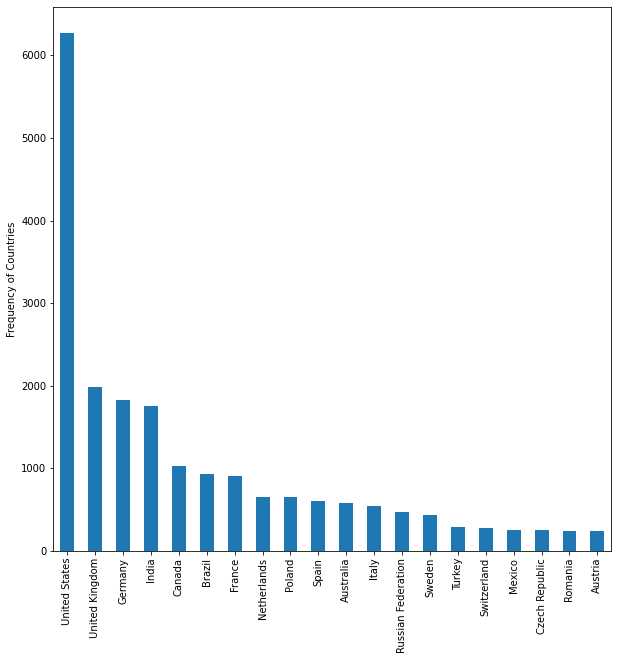

In [ ]:
# Checking the distribution of countries
plt.figure(figsize=(10,10))
survey_public_df_clean["Country"].value_counts()[:20].plot.bar()
plt.ylabel('Frequency of Countries')
plt.show()

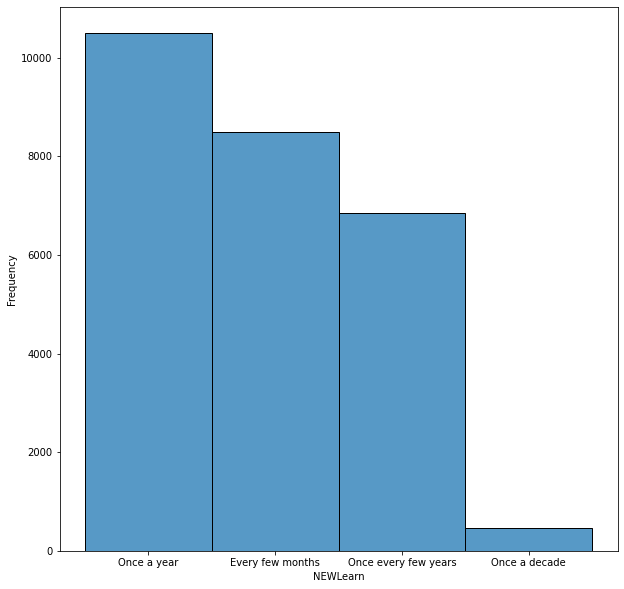

In [ ]:
# Checking the distribution of Newlearn
plt.figure(figsize=(10,10))
sns.histplot(x='NEWLearn',data=survey_public_df_clean,kde=False)
plt.ylabel('Frequency')
# plt.xlabel('Country')
plt.show()

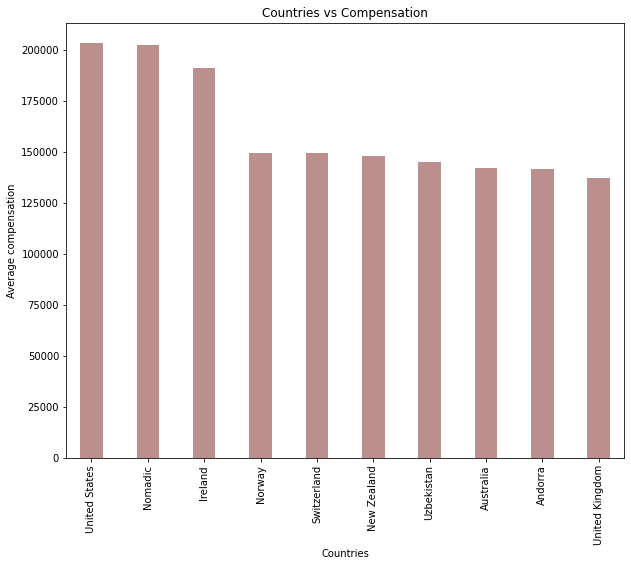

In [ ]:
# Checking countries vs compensation
plt.figure(figsize=(10,8))
survey_public_df_clean.groupby(['Country'])['ConvertedComp'].mean().sort_values(ascending=False)[:10].plot.bar(width=0.4,color='rosybrown')
plt.title('Countries vs Compensation')
plt.ylabel('Average compensation')
plt.xlabel('Countries')
plt.show()

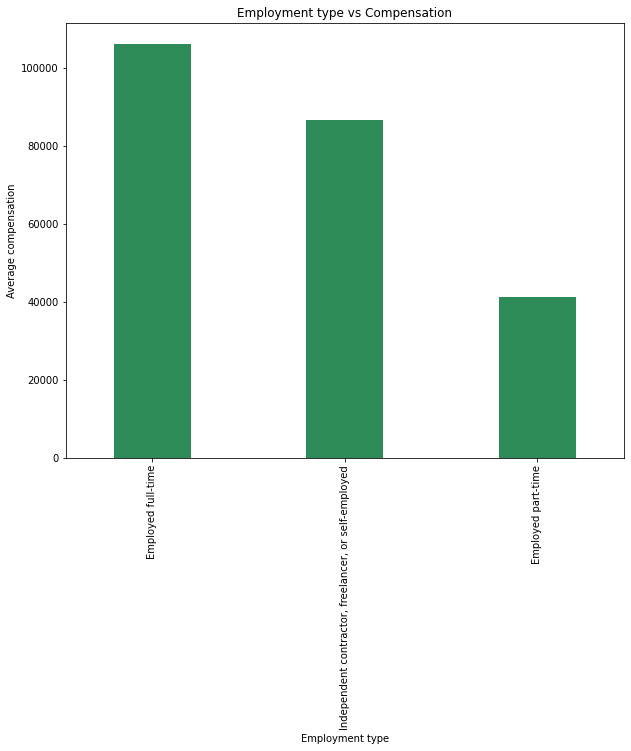

In [ ]:
# Checking employment type vs compensation
plt.figure(figsize=(10,8))
survey_public_df_clean.groupby(['Employment'])['ConvertedComp'].mean().sort_values(ascending=False).plot.bar(width=0.4,color='seagreen')
plt.title('Employment type vs Compensation')
plt.ylabel('Average compensation')
plt.xlabel('Employment type')
plt.show()

In [ ]:
# We can see the full time employees have the highest compensation

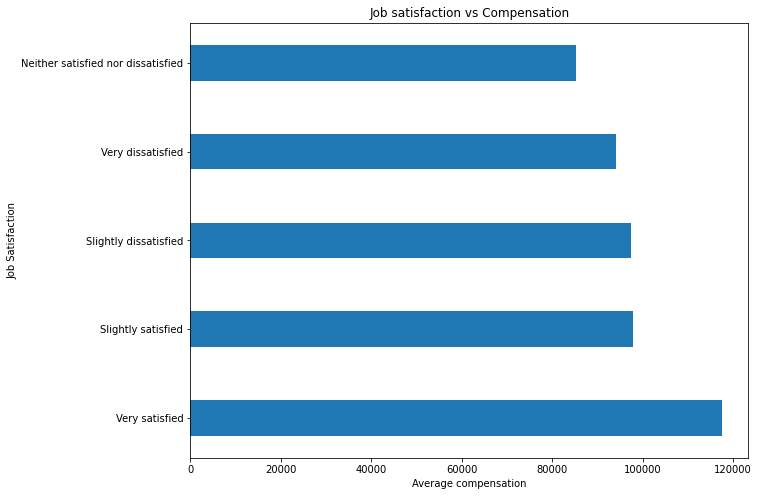

In [ ]:
# Checking Job satisfaction vs compensation
plt.figure(figsize=(10,8))
survey_public_df_clean.groupby(['JobSat'])['ConvertedComp'].mean().sort_values(ascending=False).plot.barh(width=0.4)
plt.title('Job satisfaction vs Compensation')
plt.ylabel('Job Satisfaction')
plt.xlabel('Average compensation')
plt.show()

In [ ]:
# We can see that there is direct relation of job satisfaction with compensation.

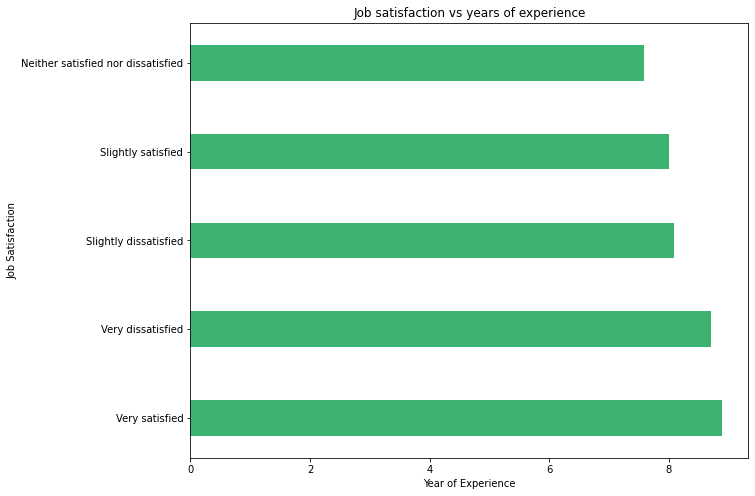

In [ ]:
# Checking Job satisfaction vs years of experience
plt.figure(figsize=(10,8))
survey_public_df_clean.groupby(['JobSat'])['YearsCodePro'].mean().sort_values(ascending=False).plot.barh(width=0.4, color='mediumseagreen')
plt.title('Job satisfaction vs years of experience')
plt.ylabel('Job Satisfaction')
plt.xlabel('Year of Experience')
plt.show()

In [ ]:
# We can see from the above plot that there is no relation of job satisfaction with year of experience

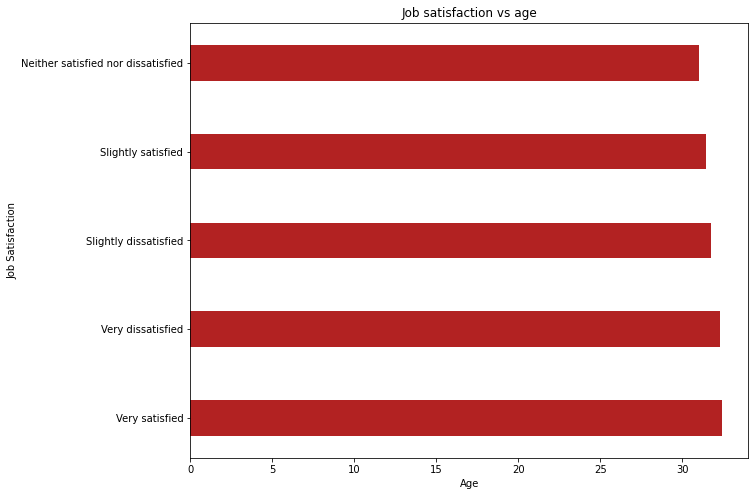

In [ ]:
# Checking Job satisfaction vs age
plt.figure(figsize=(10,8))
survey_public_df_clean.groupby(['JobSat'])['Age'].mean().sort_values(ascending=False).plot.barh(width=0.4, color='firebrick')
plt.title('Job satisfaction vs age')
plt.ylabel('Job Satisfaction')
plt.xlabel('Age')
plt.show()

In [ ]:
# There is slight but clear realtion of job satisfaction with age

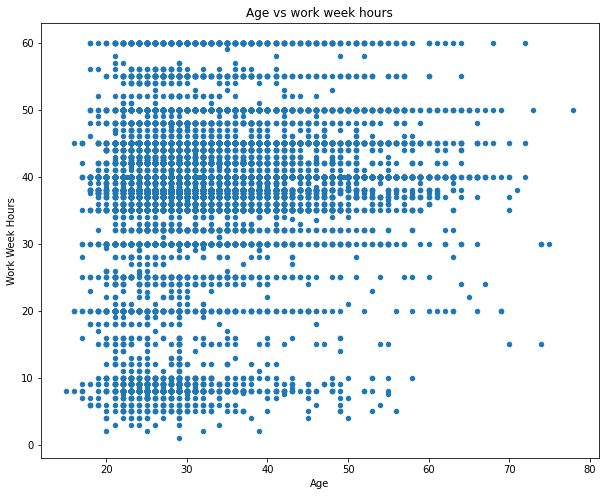

In [ ]:
# Checking Age vs work week hours
survey_public_df_clean.plot.scatter(x='Age',y='WorkWeekHrs', figsize=(10,8))
plt.title('Age vs work week hours')
plt.ylabel('Work Week Hours')
plt.xlabel('Age')
plt.show()

In [ ]:
# Thus there is no direct relation of age and work week hours. 
# However highest work week hours is very clear between the age 20-40

# **Conclusion**